In [1]:
import pandas as pd
import argparse
import numpy as np
import pickle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-02rzoxo0 because the default path (/gpfs/home/lc3424/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def pr_curve(file_name, c='AD'):
    def softmax(a, axis=None):
        """
        Computes exp(a)/sumexp(a); relies on scipy logsumexp implementation.
        :param a: ndarray/tensor
        :param axis: axis to sum over; default (None) sums over everything
        """
        from scipy.special import logsumexp
        lse = logsumexp(a, axis=axis)  # this reduces along axis
        if axis is not None:
            lse = np.expand_dims(lse, axis)  # restore that axis for subtraction
        return np.exp(a - lse)

    inp = pickle.load(open(file_name, 'rb'))
    # inp['out'] = softmax(inp['out'], axis=1)
    df2 = pd.concat([inp['res'], pd.DataFrame(inp['out'], columns=['CN', 'MCI', 'AD'])], axis=1)
    c_num = 0
    if c == 'AD':
        c_num = 2
    elif c == 'MCI':
        c_num = 1
    elif c == 'CN':
        c_num = 0
    else:
        raise Exception('exception')

    p, r, _ = precision_recall_curve((df2.Label.to_numpy() == c_num).astype(int), df2[c].to_numpy())
    plt.plot(r, p, lw=2, label=c)

def pr_curve_aggregate(file_name):
    for c in ['CN', 'MCI', 'AD']:
        pr_curve(file_name, c)
    plt.legend(loc="best")
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.title("Precision-recall curve for {}".format(" ".join(file_name.split('/')[-1].split('.')[0].split('_')[1:])))
    plt.savefig("figures/precision_recall_curve_{}.png".format("_".join(file_name.split('/')[-1].split('.')[0].split('_')[1:])), facecolor='white')
    plt.show()

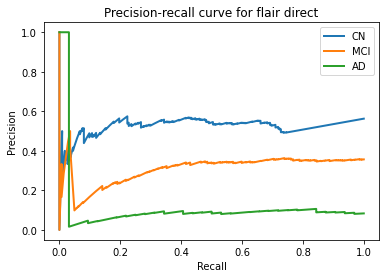

In [4]:
file_name = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/experiments/20211102/res_flair_direct.pkl'
pr_curve_aggregate(file_name)